#Trabajo practico 1

integrantes:
Alvarez Vico Jazmín
Cortes Conde Tito Maria Javier
Frassia Fernando Nicolas


Aclaraciones preliminares

sobre la hipotesis nula:
Se define hipotesis nula como la proposición de que dos fenómenos medidos no están relacionados.
Al rechazar la hipotesis nula podemos decir infermios que es probable que dicha relación si exista

Sobre el p valor:
el p valor nos indica la probabilidad de obtener un valor igual o más extremo al obtenido a travez de una medición, asumiendo cierta la hipotesis nula.

Al obtener un p valor chico (tradicionalmente se considera chico un p valor meno o igual a 0,05) rechazamos la hipotesis nula. Pues esto significa que es muy poco probable obtener un resultado semejante con un espacio muestral distinto al que tenemos.

En esta caso decimos que nuestra muestra es estadisticamente significativa, reforzando nustra hipotesis alternativa. 

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

funciones auxiliares

In [7]:
def igual_varianza(l1,l2):
    estadistico = np.var(l1) / np.var(l2) 
    pval=  sp.stats.f.cdf(estadistico,len(l1)-1, len(l2)-1)
    #print("pval = " + str(pval))
    return pval>=0.05

def distribucion_normal(l1):
    return sp.stats.shapiro(l1)[1] >=0.05

def test_permutaciones(l1,l2,cant_permutaciones):
    
    meanl1 = np.mean(l1)
    meanl2 = np.mean(l2)
    l1 = [x for x in l1]
    l2 = [x for x in l2]
    muestra = l1+l2
    il1 = len(l1)-1
    delta=[] 
    delta.append(meanl2-meanl1)

    for i in range(0,cant_permutaciones):

        random.shuffle(muestra)
        currentDelta = np.mean(muestra[:il1+1]) - np.mean(muestra[il1+1:])
        delta.append(currentDelta)

    aux = 1
    for i in range(1,len(delta)):
        if delta[0] <= delta[i]:
            aux += 1
    pval = aux/len(delta)
    
    plt.axvline(x=delta[0], color='r')
    plt.hist(delta)
    plt.show()
    print("p value = " + str(pval)) 

    
def  wilcoxon_apareadas(l1,l2):
    pval= sp.stats.wilcoxon(l1,l2)[1]
    print("p value = " + str(pval))
    
def igual_media_apareada(l1,l2,cant_permut): 
    if distribucion_normal(l1) and distribucion_normal(l2):
        print("checkeo distribución normal: No concluyente, suponemos normalidad")
        ig_var = igual_varianza(l1,l2)
        ig_var2 = igual_varianza(l2,l1)
        if (ig_var and ig_var2):            
            print("checkeo varianza: No concluyente, suponemos igual varianza")
            print("utilizamos test de Student")
            pval = sp.stats.ttest_rel(l1, l2)[1]
            print("p value = " + str(pval) )
        else:
            print("checkeo varianza: NO")
            print("utilizamos test de Welsh")
            pval = sp.stats.ttest_ind(l1, l2)[1]
            print("p value = " + str(pval) )
            
    print("utilizamos test de Wilcoxon, sin asumir igual varianza y distribucion normal")
    wilcoxon_apareadas(l1,l2)
            
def igual_media_1muesrta(l):
    if distribucion_normal(l):
        print("checkeo distribución normal: ok") 
        meanl = np.mean(l)
        pval = sp.stats.ttest_1samp(l,meanl)[1]
        print("p value = " + str(pval) )
    

    
def anova2ways():
    df=DataFrame()
    df.read_tbl('tiempos.txt')
    df['id'] = xrange(len(df['len']))
 
    print(df.anova('len', sub='id', bfactors=['supp', 'dose']))

#divide por tres por que quiero el promedio, es una funcion muy especifica usarla con quidado
def sumLista(l1, l2):
    l3 =[]
    for i in range(len(l1)):
        l3.append((l1[i] +l2[i])/3.0)
    
    return l3
    



Lectura de datos

In [3]:
df = pd.read_csv('tiempos.txt', sep=' ')

Gráficos preliminares

/home/javier/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


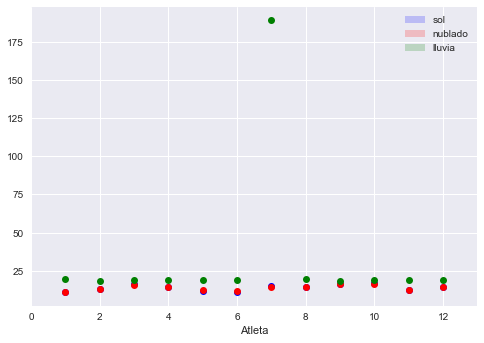

In [4]:
sol = sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")

nublado = sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")

lluvia = sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")

sns.plt.legend([sol, nublado, lluvia], labels=["sol","nublado","lluvia"])

sns.plt.show()


podemos observar que un dato tiene un valor "extraño", tiene un valor mucho mayor a los demas. Suponemos que se debe a un error de tipeo.


Limpieza

Tomamos la decisión de borrar la fila.


/home/javier/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


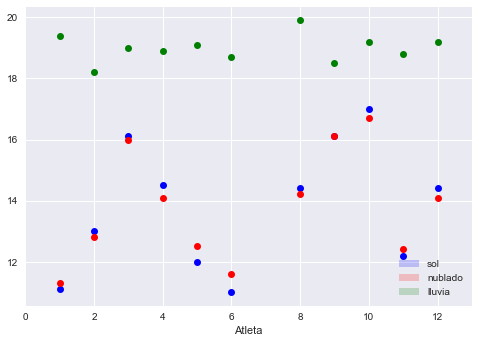

In [5]:
df.drop(df[df.tiempo_lluvia > 180.0].index, inplace=True)

sol = sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")

nublado = sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")

lluvia = sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")

sns.plt.legend([sol, nublado, lluvia], labels=["sol","nublado","lluvia"])

sns.plt.show()


Analisis de Datos

# Hipótesis: Los atletas son más lentos en días de lluvias que en días soleados.

Para esto probaremos utilizar los tests parametricos de ser posible, luego también realizaremos el Test de Permutaciones. 
Nuestra hipotesis nula es: Los atelatas no son más lentos en días de lluvia que en días soleados. Equivalentemente decimos que los atletas son igualmente rapidos o más rápidos en días lluviosos que en días soleados.

checkeo distribución normal: ok
checkeo varianza: NO
utilizamos test de Welsh
p value = 9.83213012775e-06


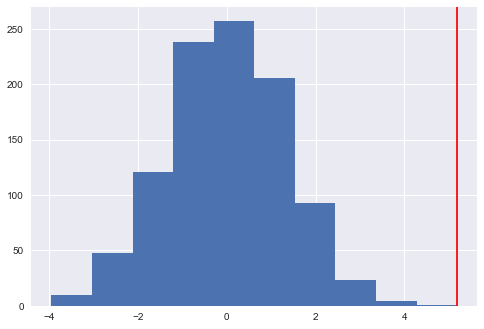

p value = 0.000999000999000999


In [8]:
igual_media_apareada(df['tiempo_sol'], df['tiempo_lluvia'],1000)
 

test_permutaciones(df['tiempo_sol'],df['tiempo_lluvia'],1000)



podemos observar q de ambos tests obtenemos p valores pequños.
A raíz de esto, podemos rechazar nuestra hipotesis nula fortaleciendo nuestra hipotesis alternativa.



In [ ]:
Hipótesis: El cielo nublado no influye en los tiempos de los atletas

Hipotesś nula: el cielo nublado influye en los tiempos de los atletas


checkeo distribución normal: ok
checkeo varianza: ok
utilizamos test de Student
p value = 1.0


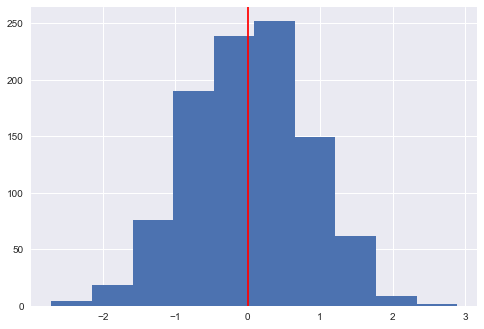

p value = 0.5234765234765235


In [10]:
igual_media_apareada(df['tiempo_sol'], df['tiempo_nublado'],1000)
test_permutaciones(df['tiempo_sol'],df['tiempo_nublado'],1000)

Consjeos al entrenador:
1- Recomendamos que los atletas entrenen en días de lluvia, ya que sostenemos que hay altas probabilidades de que los atletas sean más lentos en estos días, de esta forma creemos que el entrenamiento sera más intenso.
